In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df1 = pd.read_csv('Cheapestelectriccars-EVDatabase.csv')
df2 = pd.read_csv('ElectricCarData_Clean.csv')

In [3]:
df1.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [4]:
df2.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


Data pre-processing of df1

In [5]:
df1.shape

(180, 11)

In [6]:
df1.isnull().any()

Name               False
Subtitle           False
Acceleration       False
TopSpeed           False
Range              False
Efficiency         False
FastChargeSpeed    False
Drive              False
NumberofSeats      False
PriceinGermany      True
PriceinUK           True
dtype: bool

No NULL values present in required columns of df1 <br> Now we drop the columns which are not required in df1

In [7]:
df1=df1.drop('Subtitle',axis=1)
df1=df1.drop('Drive',axis=1)
df1=df1.drop('PriceinUK',axis=1)
df1=df1.drop('PriceinGermany',axis=1)
df1=df1.drop('FastChargeSpeed',axis=1)
df1.head()

,Name,Acceleration,TopSpeed,Range,Efficiency,NumberofSeats
0,Opel Ampera-e,7.3 sec,150 km/h,335 km,173 Wh/km,5
1,Renault Kangoo Maxi ZE 33,22.4 sec,130 km/h,160 km,194 Wh/km,5
2,Nissan Leaf,7.9 sec,144 km/h,220 km,164 Wh/km,5
3,Audi e-tron Sportback 55 quattro,5.7 sec,200 km/h,375 km,231 Wh/km,5
4,Porsche Taycan Turbo S,2.8 sec,260 km/h,390 km,215 Wh/km,4


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           180 non-null    object
 1   Acceleration   180 non-null    object
 2   TopSpeed       180 non-null    object
 3   Range          180 non-null    object
 4   Efficiency     180 non-null    object
 5   NumberofSeats  180 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 8.6+ KB


now we need to convert object datatype to int or float

In [9]:
df1['Acceleration'] = df1['Acceleration'].str.replace('sec','')
df1['Acceleration'] = df1['Acceleration'].astype(float)

df1['TopSpeed'] = df1['TopSpeed'].str.replace('km/h','')
df1['TopSpeed'] = df1['TopSpeed'].astype(int)

df1['Range'] = df1['Range'].str.replace('km','')
df1['Range'] = df1['Range'].astype(int)

df1['Efficiency'] = df1['Efficiency'].str.replace('Wh/km','')
df1['Efficiency'] = df1['Efficiency'].astype(int)


In [10]:
df1.head()

,Name,Acceleration,TopSpeed,Range,Efficiency,NumberofSeats
0,Opel Ampera-e,7.3,150,335,173,5
1,Renault Kangoo Maxi ZE 33,22.4,130,160,194,5
2,Nissan Leaf,7.9,144,220,164,5
3,Audi e-tron Sportback 55 quattro,5.7,200,375,231,5
4,Porsche Taycan Turbo S,2.8,260,390,215,4


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           180 non-null    object 
 1   Acceleration   180 non-null    float64
 2   TopSpeed       180 non-null    int32  
 3   Range          180 non-null    int32  
 4   Efficiency     180 non-null    int32  
 5   NumberofSeats  180 non-null    int64  
dtypes: float64(1), int32(3), int64(1), object(1)
memory usage: 6.5+ KB


In [12]:
df1.describe()

,Acceleration,TopSpeed,Range,Efficiency,NumberofSeats
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,7.854444,176.400000,337.388889,194.272222,5.166667
std,3.169465,42.096006,118.718078,32.684001,0.971666
min,2.100000,123.000000,95.000000,104.000000,2.000000
25%,5.575000,150.000000,258.750000,168.000000,5.000000
50%,7.500000,160.000000,340.000000,188.500000,5.000000
75%,9.625000,200.000000,400.000000,215.250000,5.000000
max,22.400000,410.000000,970.000000,281.000000,7.000000


In [20]:
df1['NumberofSeats'].value_counts()

5    118
7     32
4     28
2      2
Name: NumberofSeats, dtype: int64

**5 seat EV is the most commonly used.**

In [21]:
df1['Name'].nunique()

174

**Heatmap**

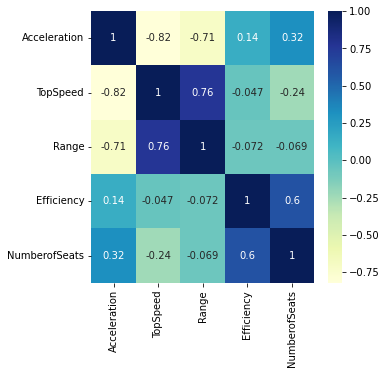

In [28]:
plt.figure(figsize=(5,5))
sns.heatmap(df1.corr(), annot=True, cmap="YlGnBu")
plt.show()

**Countplot**

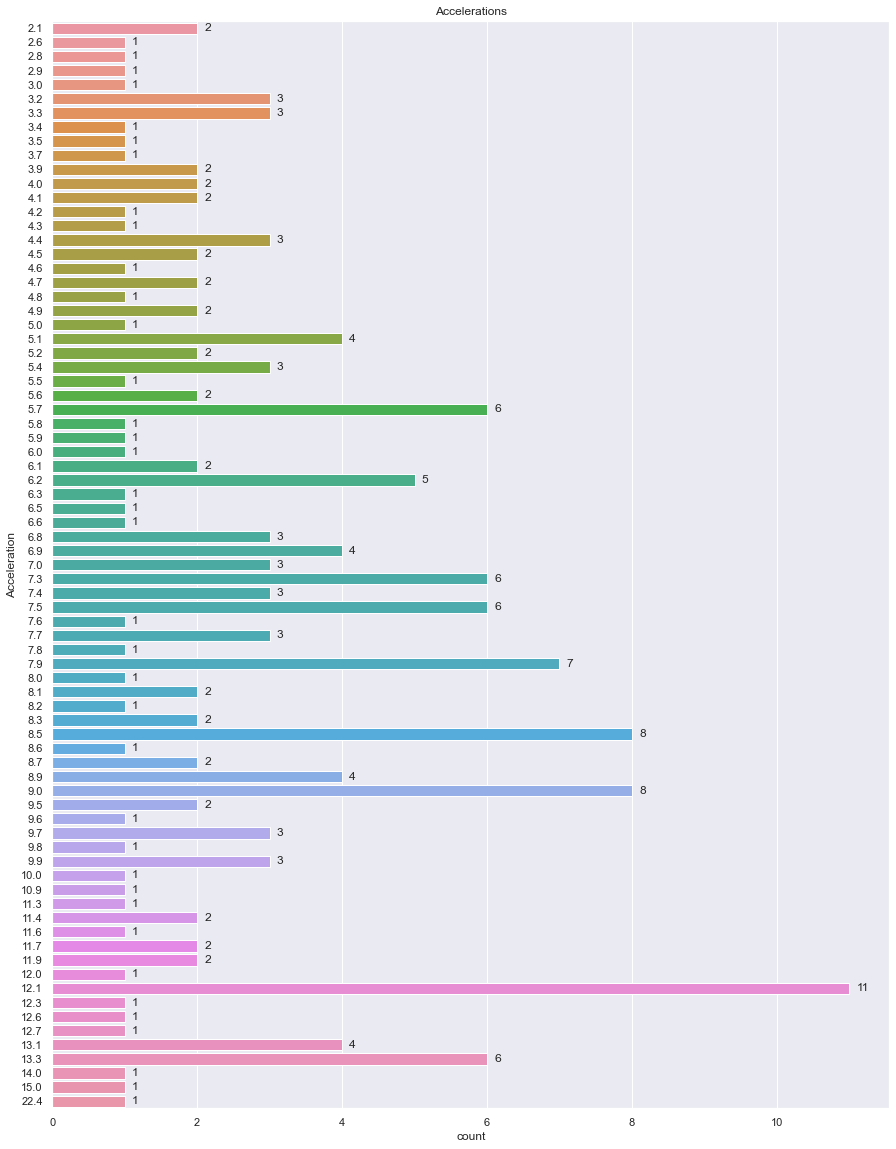

In [53]:
sns.set(rc={'figure.figsize':(15,20)})
ax = sns.countplot(y=df1['Acceleration'], data=df1)
ax.set(title='Accelerations') # title countplot

# label each bar in countplot
for p in ax.patches:
    
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (acceleration)

    # adding text to each bar
    ax.text(x = width+0.1, # x-coordinate position of data label, padded 0.1 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center


[Text(0.5, 1.0, 'TopSpeed')]

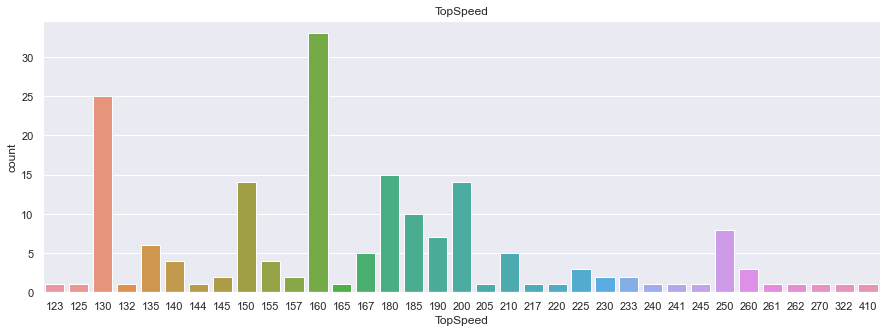

In [97]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(x=df1['TopSpeed'], data=df1)
ax.set(title='TopSpeed') # title countplot